In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [363]:
import kagglehub

# Download the file path (this returns a local file path)
path = kagglehub.dataset_download("fedesoriano/air-quality-data-set", "AirQuality.csv")

# Load it with pandas, specifying the correct separator
df = pd.read_csv(path, sep=";")

print(df.head())

Using Colab cache for faster access to the 'air-quality-data-set' dataset.
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110

In [364]:
df.shape

(9471, 17)

In [365]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [367]:
df.isna().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [368]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [369]:
df.drop(columns=['Unnamed: 15'], inplace=True)

In [370]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN


In [371]:
df.drop(columns=['Unnamed: 16'], inplace=True)

In [372]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [373]:
df.isna().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [375]:
cols_with_missing=df.columns[df.isna().sum()>0].tolist()

cols_with_missing

['Date',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [376]:
for col in cols_with_missing:
    print(df[df[col].isna()].head())
    print('-'*40)

     Date Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
9357  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9358  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9359  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9360  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9361  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    T   RH   AH  
9357           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9358           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9359           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9360           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9361           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
----------------------------------------
     Date Time CO(GT)  PT08.S1(CO)  NMHC

In [377]:
df=df.dropna(how='all')

In [378]:
df.isna().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [379]:
df.dtypes

,0
Date,object
Time,object
CO(GT),object
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),object
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


In [380]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [381]:
df['PT08.S1(CO)'].head(10)

,PT08.S1(CO)
0,1360.0
1,1292.0
2,1402.0
3,1376.0
4,1272.0
5,1197.0
6,1185.0
7,1136.0
8,1094.0
9,1010.0


In [382]:
df.dtypes

,0
Date,object
Time,object
CO(GT),object
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),object
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


In [383]:
obj_cols= ['CO(GT)','C6H6(GT)','T', 'RH', 'AH']

In [384]:
for col in obj_cols:
     print(df[col].value_counts().head())
     print('-'*40)

CO(GT)
-200    1592
1,4      279
1,6      275
1,5      273
1,1      262
Name: count, dtype: int64
----------------------------------------
C6H6(GT)
-200,0    366
3,6        84
2,8        82
3,8        79
4,0        78
Name: count, dtype: int64
----------------------------------------
T
-200    366
20,8     57
21,3     54
13,8     51
20,2     51
Name: count, dtype: int64
----------------------------------------
RH
-200    366
53,1     31
47,8     30
57,9     30
45,9     27
Name: count, dtype: int64
----------------------------------------
AH
-200      366
1,1199      6
0,8394      6
0,9684      6
0,7487      6
Name: count, dtype: int64
----------------------------------------


In [385]:
for col in obj_cols:
    df[col] = df[col].astype(str).str.replace(',','.', regex=False)
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [386]:
df.isna().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [387]:
df.dtypes

,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


In [388]:
df.shape

(9357, 15)

In [389]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [390]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [391]:
df.dtypes

,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


In [392]:
df.isna().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [393]:
df_copy = df.drop(columns=['Date', 'Time'])

# Hitung matriks korelasi
df_corr = df_copy.corr()

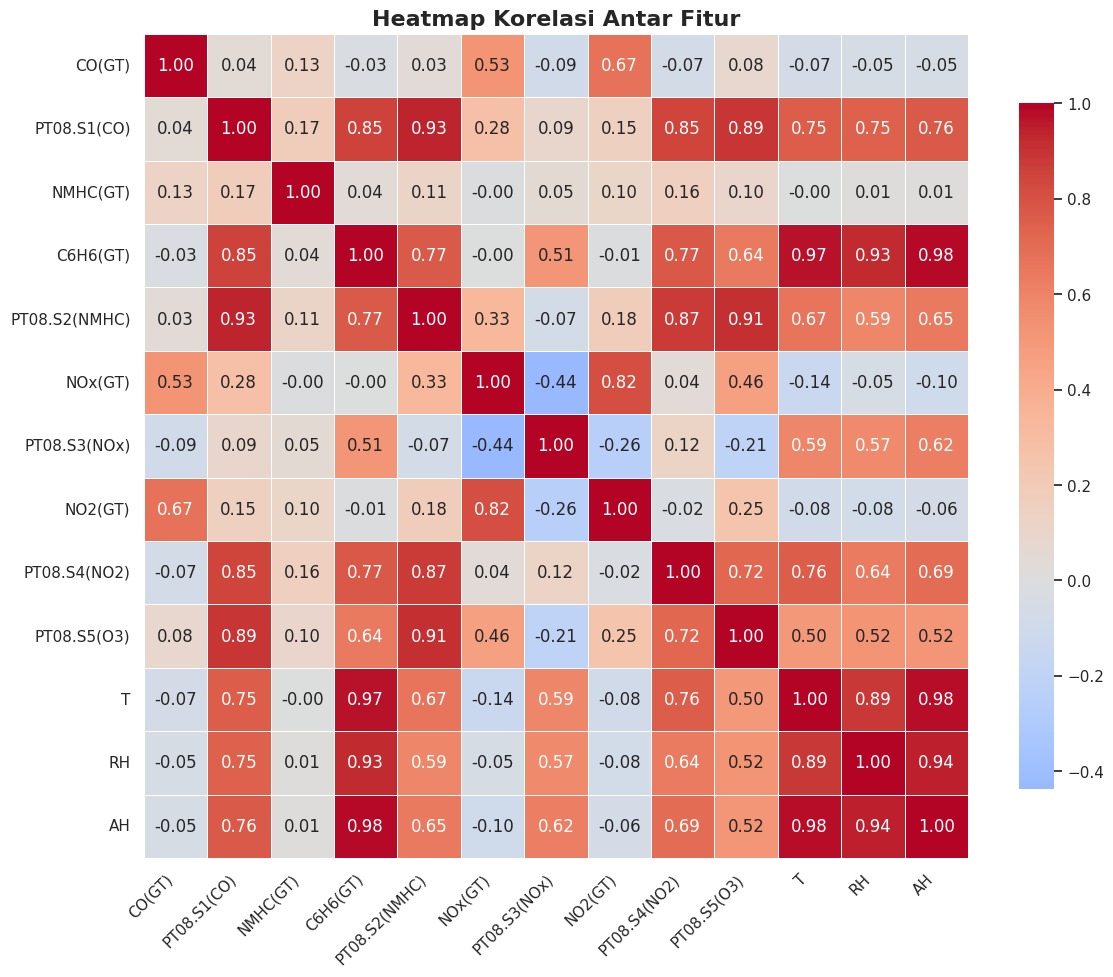

In [394]:
plt.figure(figsize=(12, 10))  # ukuran lebih besar biar lega
sns.heatmap(
    df_corr,
    annot=True,           # tampilkan angka
    fmt=".2f",            # ⚠️ PERBAIKAN: harus string ".2f" (bukan '2f')
    cmap='coolwarm',      # warna merah-putih-biru
    square=True,          # kotak persegi
    linewidths=0.5,       # garis tipis antar sel
    cbar_kws={"shrink": 0.8},  # ukuran colorbar lebih kecil
    center=0              # pusatkan warna di 0 (untuk lihat korelasi positif/negatif)
)

plt.title('Heatmap Korelasi Antar Fitur', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # rotasi label x biar tidak tumpang tindih
plt.yticks(rotation=0)               # label y tetap lurus
plt.tight_layout()
plt.show()

In [395]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

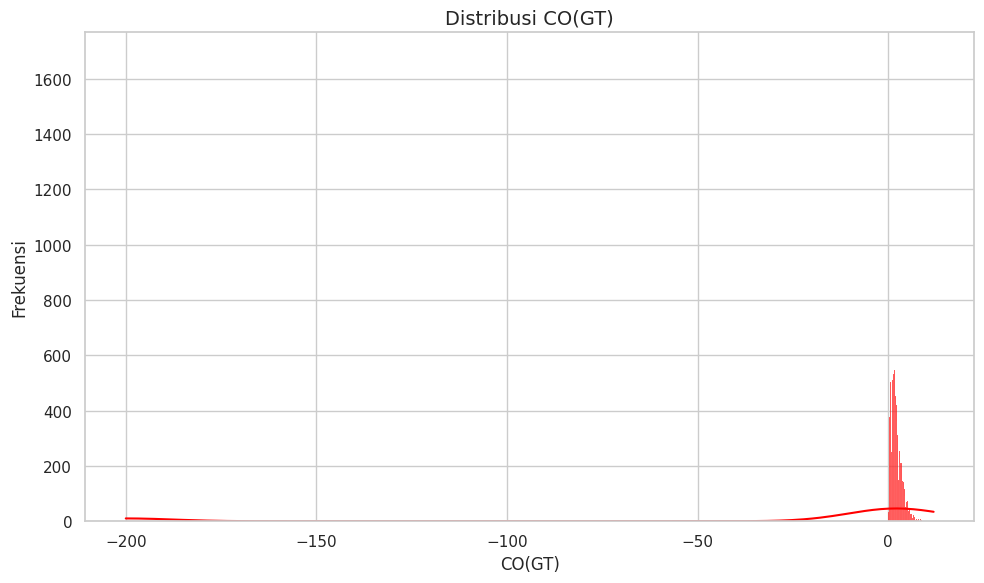

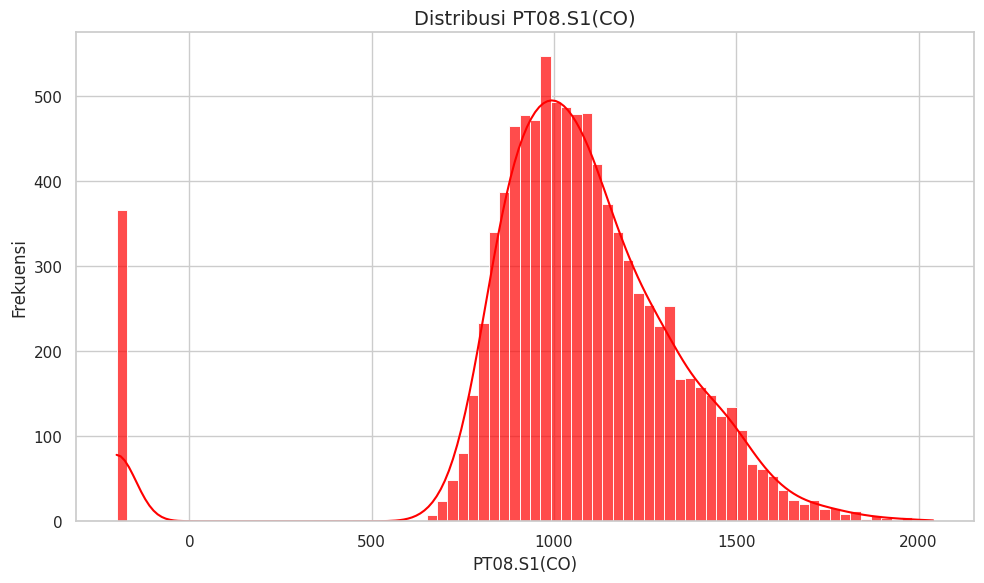

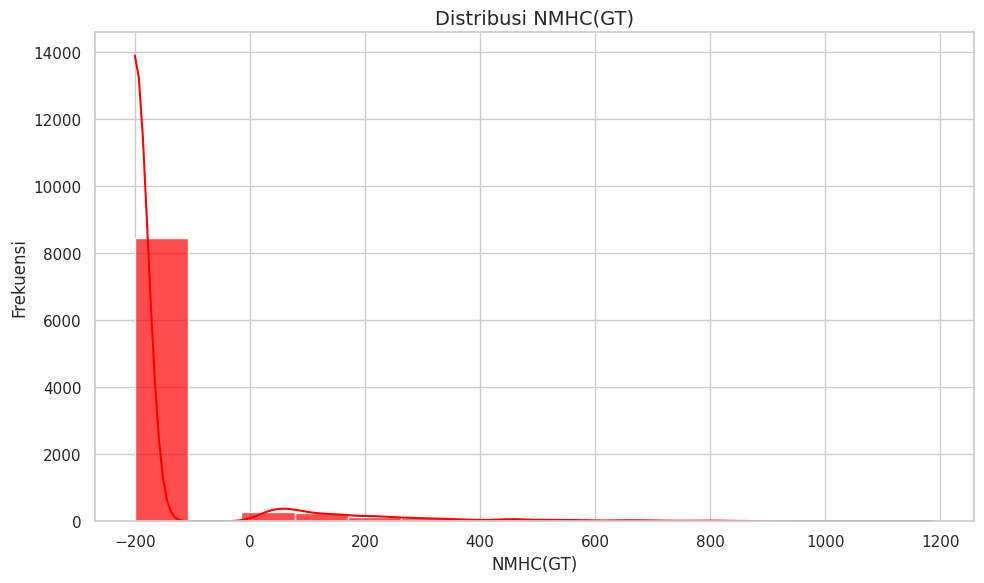

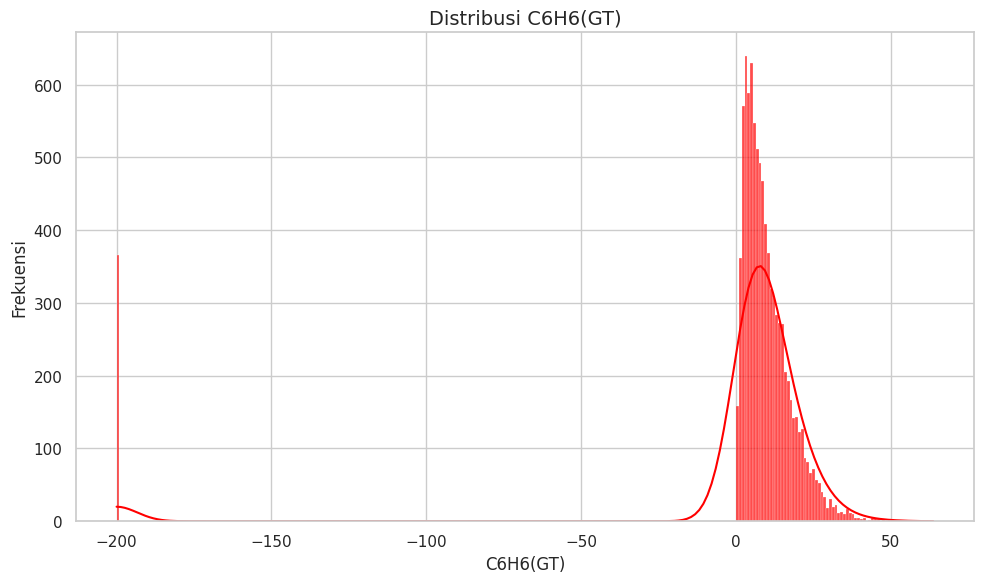

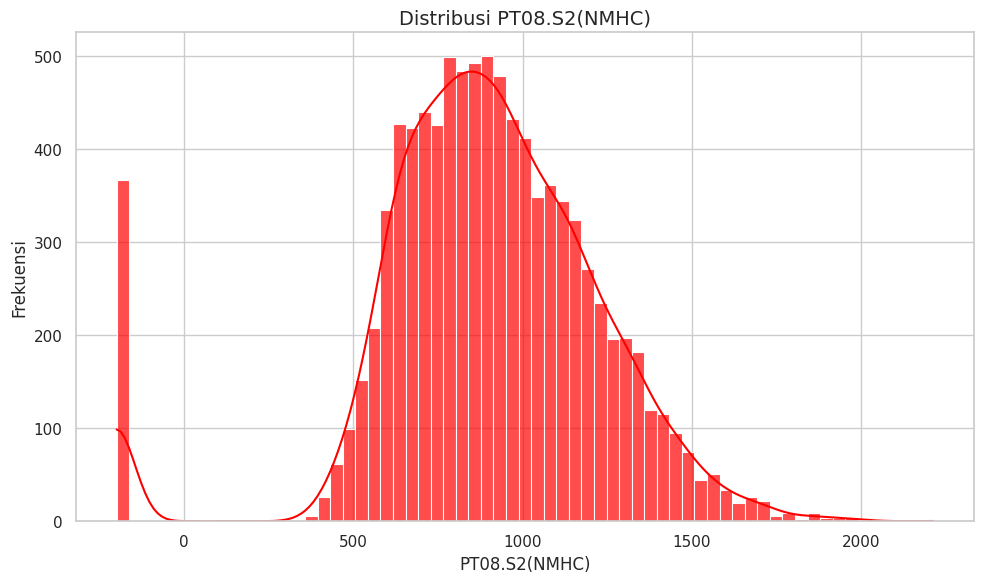

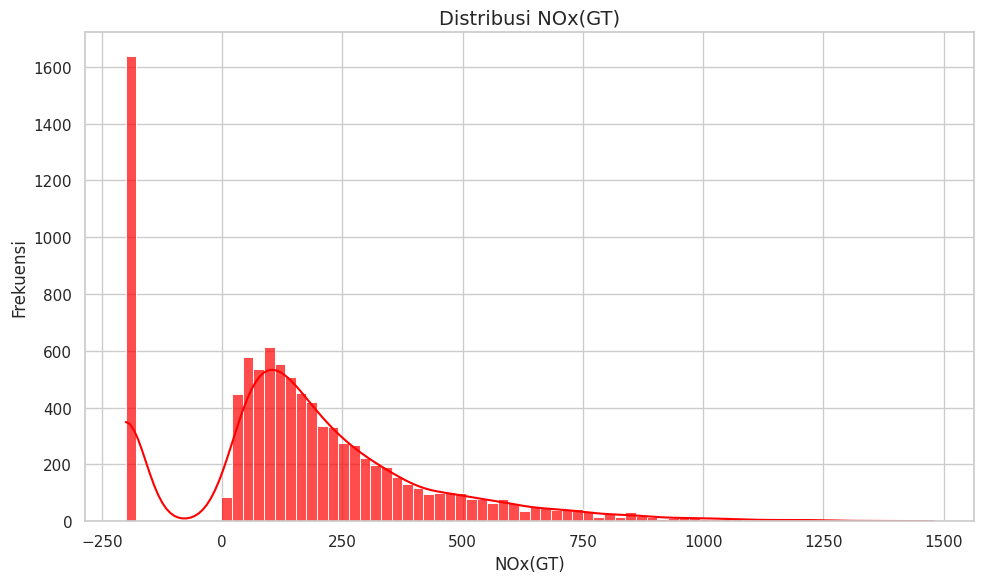

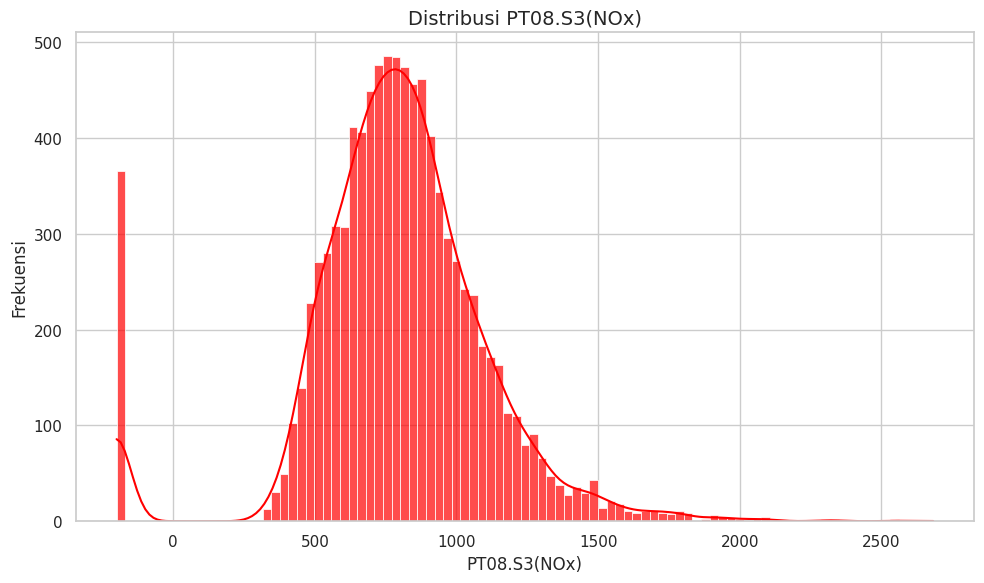

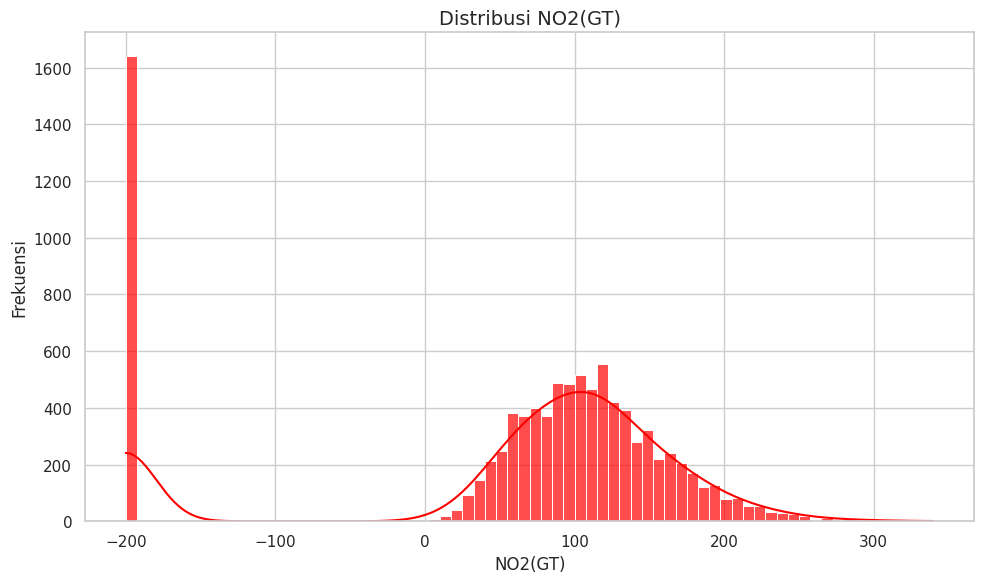

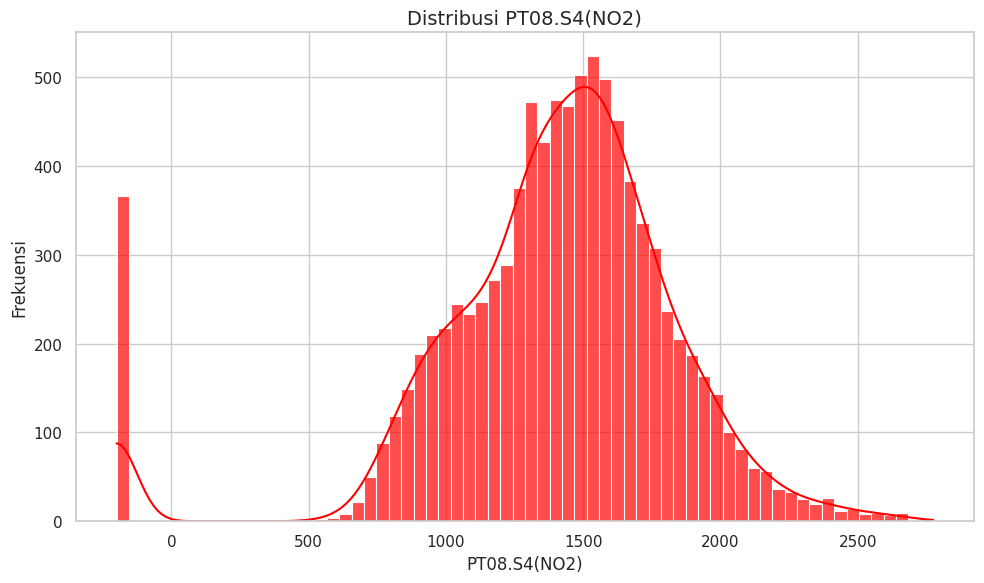

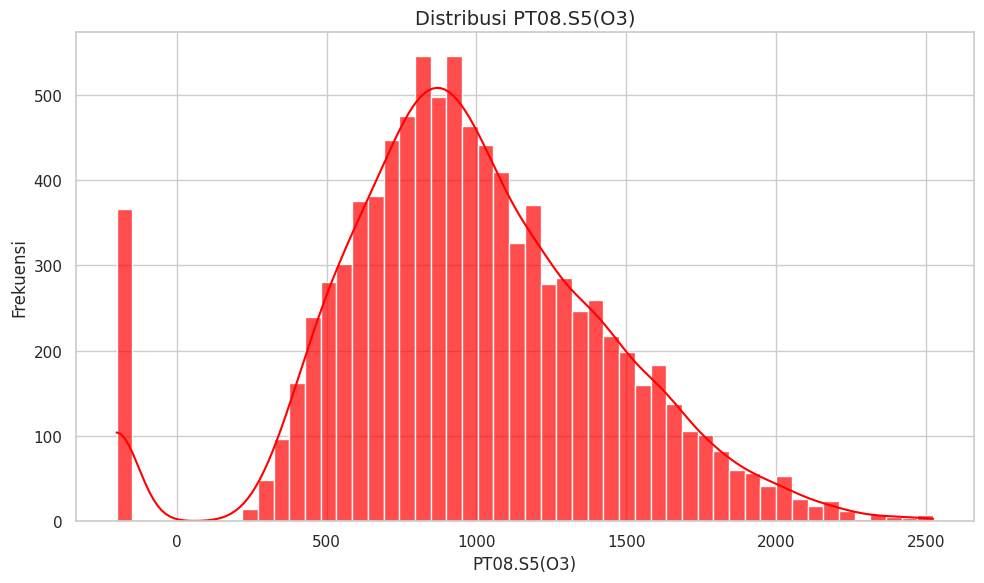

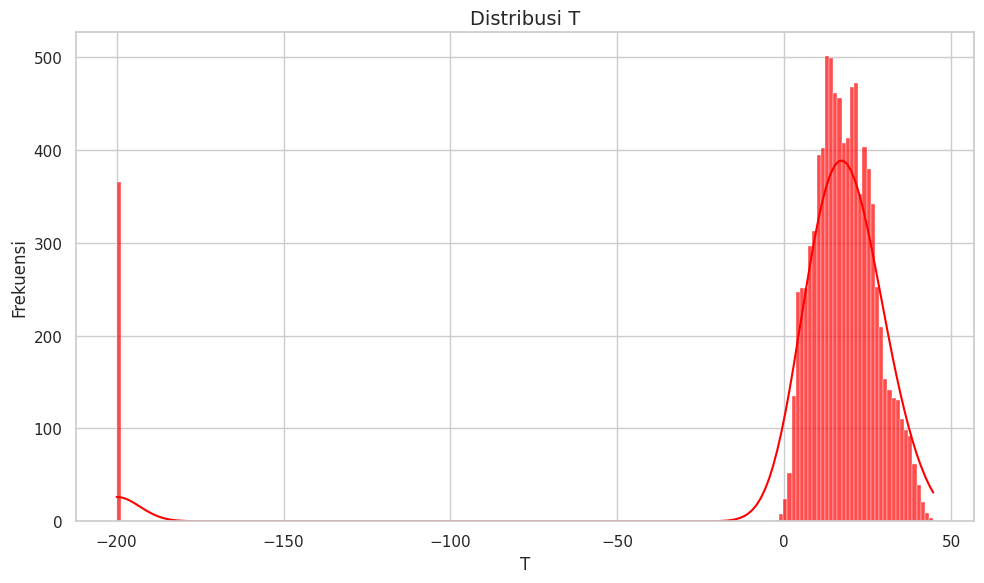

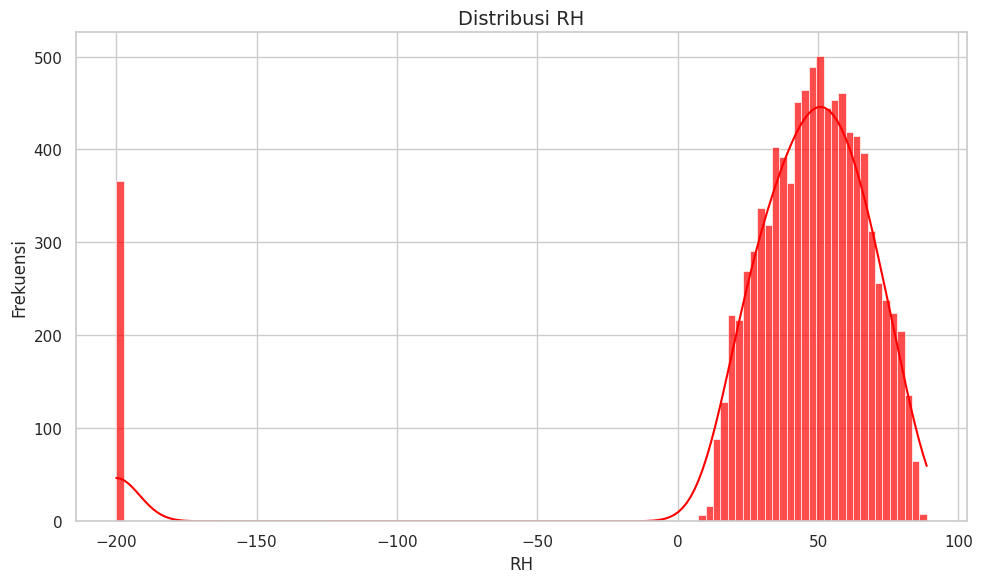

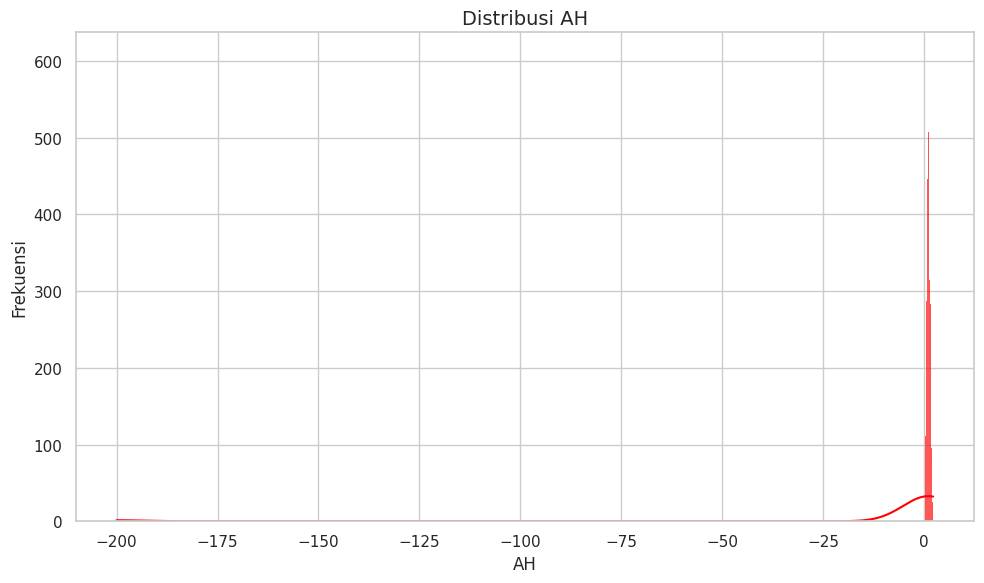

In [396]:
cols=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

sns.set(style="whitegrid")

for col in cols:
    # Skip jika semua nilai NaN
    if df[col].isna().all():
        print(f"⚠️ Kolom {col} semuanya NaN — dilewati.")
        continue
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='red', alpha=0.7)
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

In [397]:
def clean_missing(df, cols, missing_code=-200):
    for col in cols:
        df[col] = df[col].replace(missing_code, np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Pakai
df = clean_missing(df, cols)

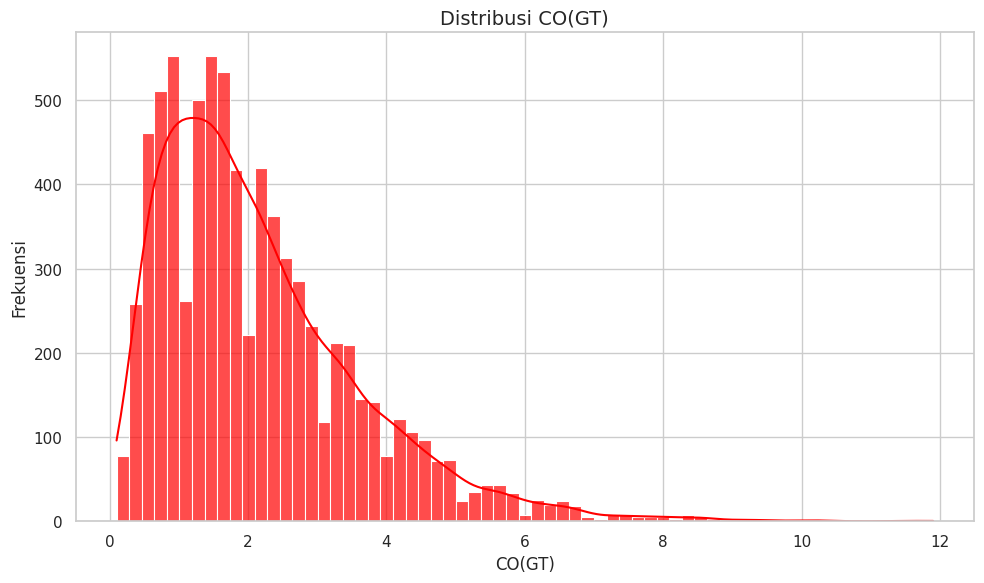

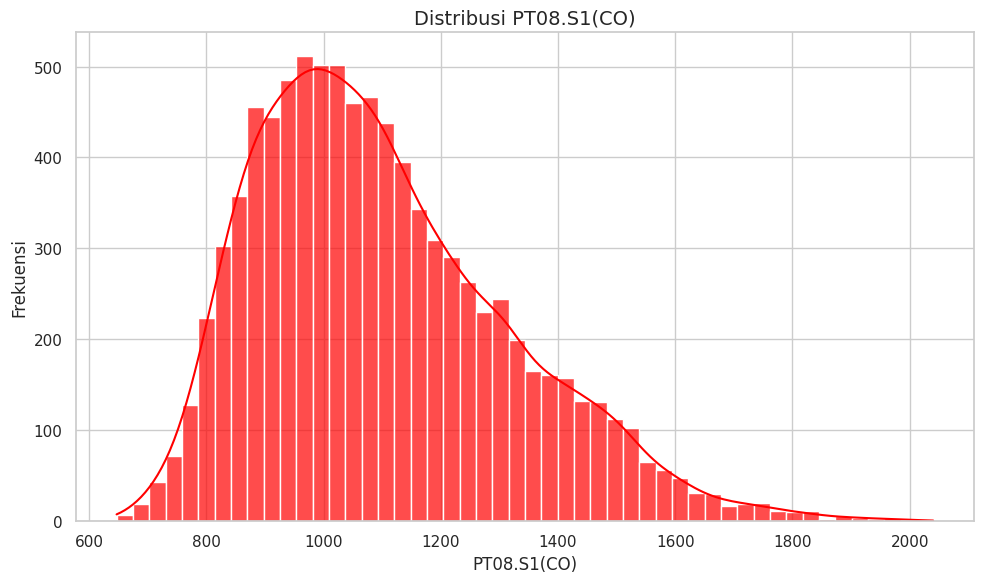

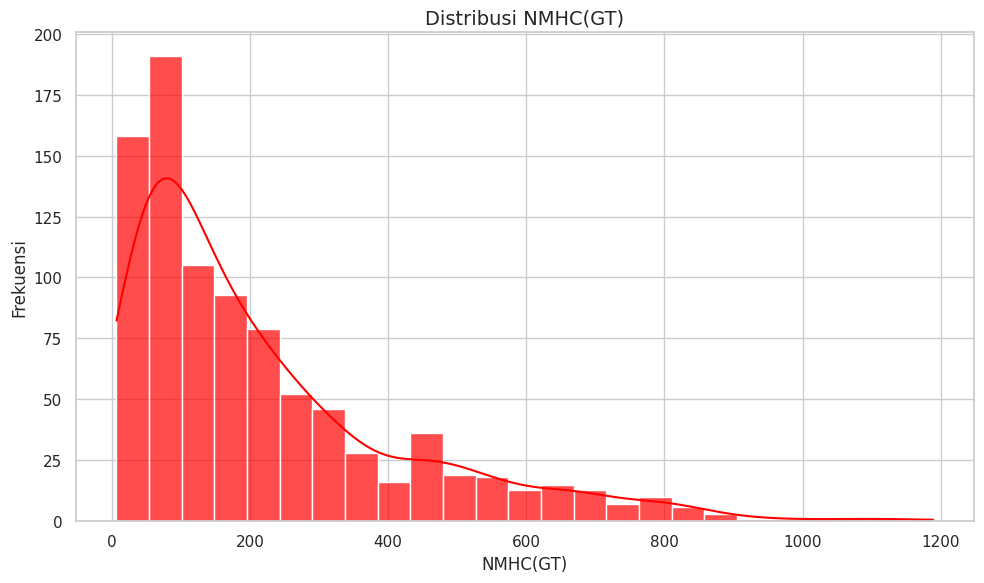

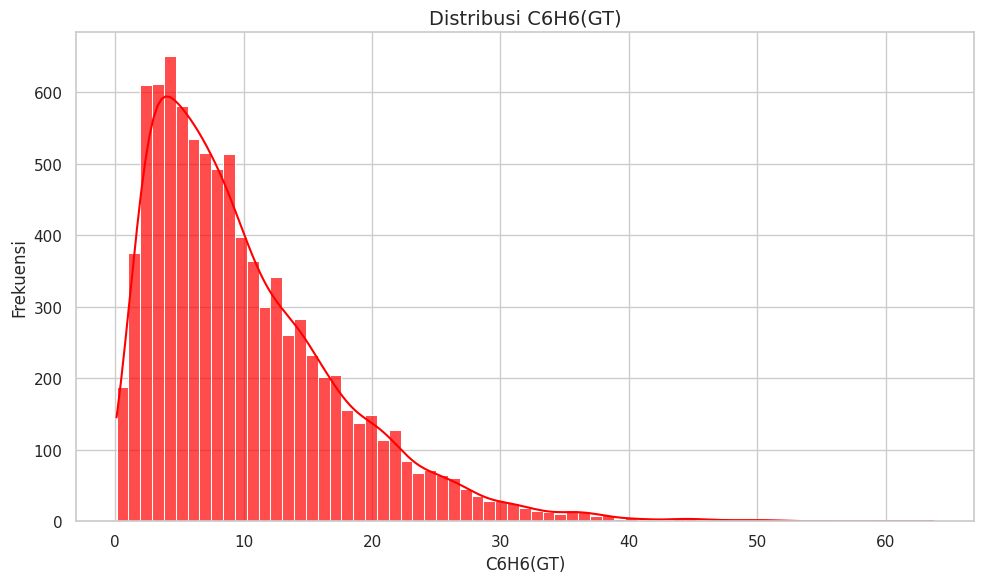

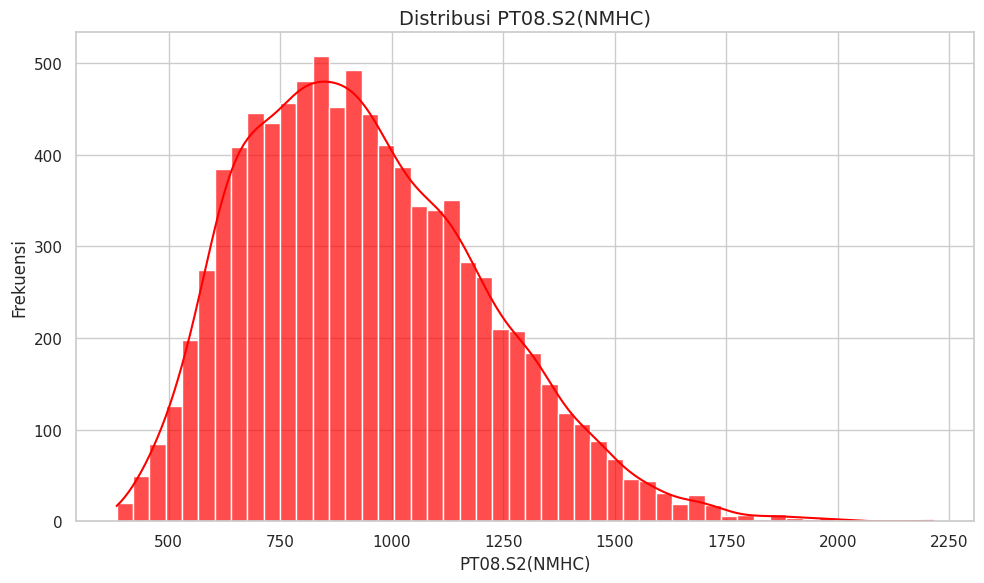

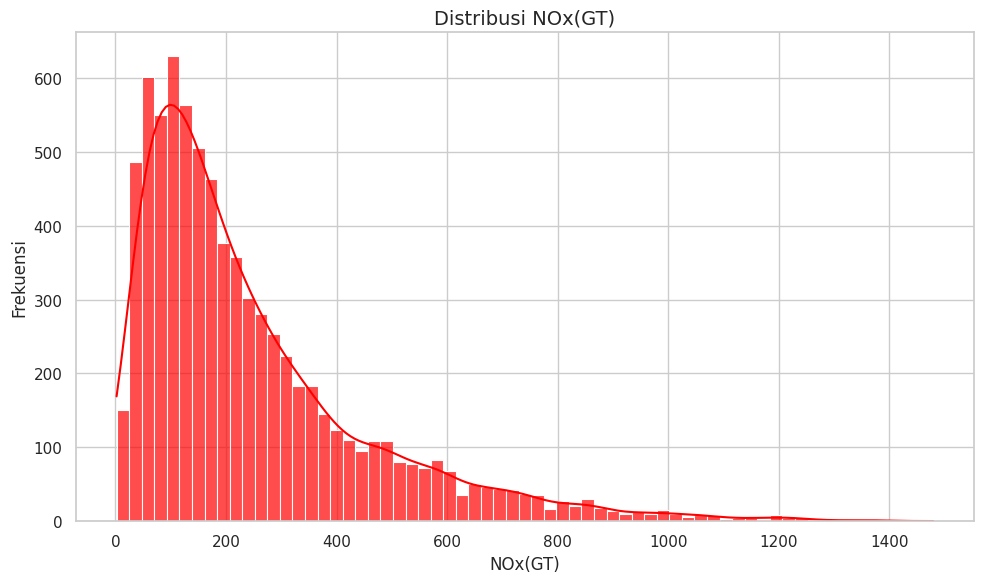

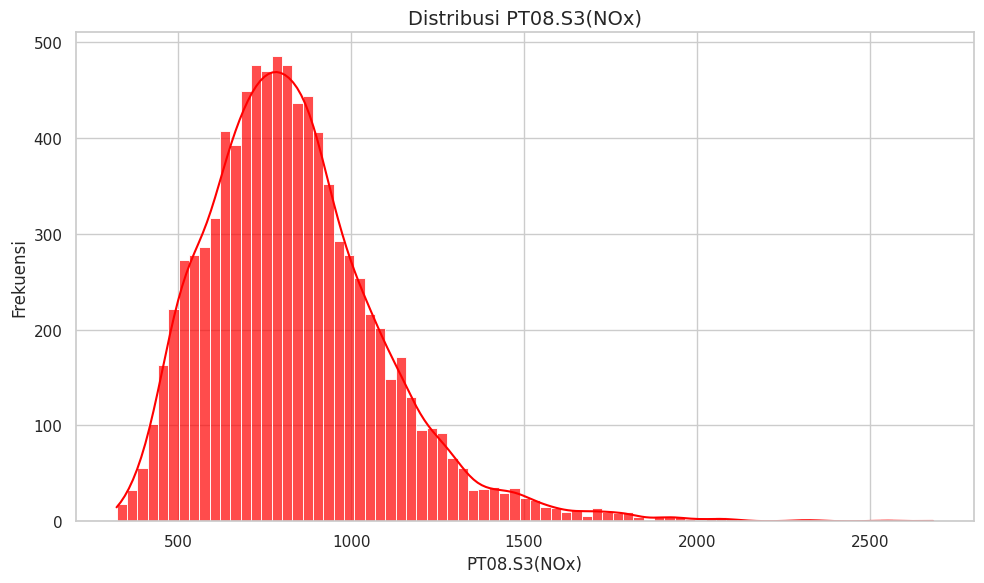

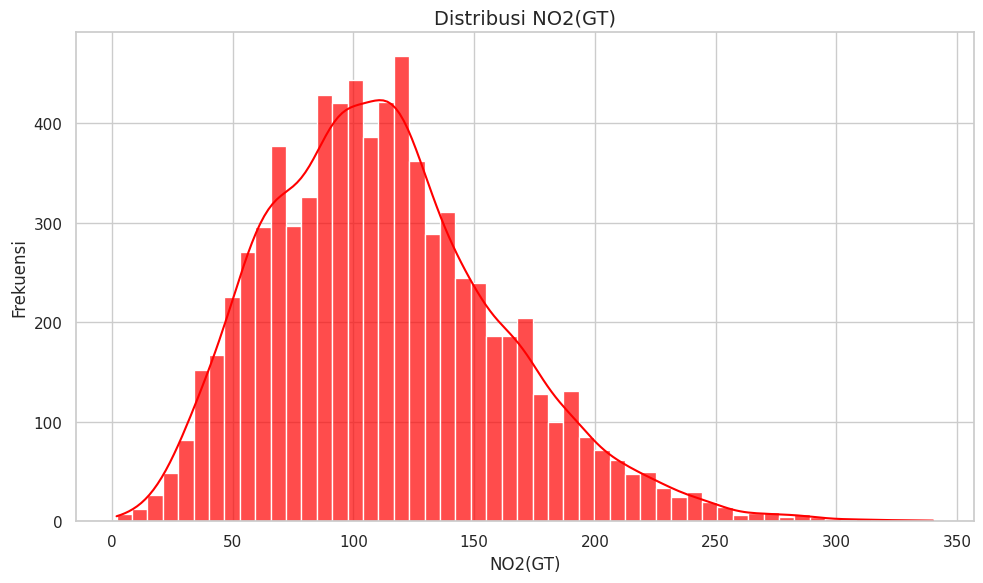

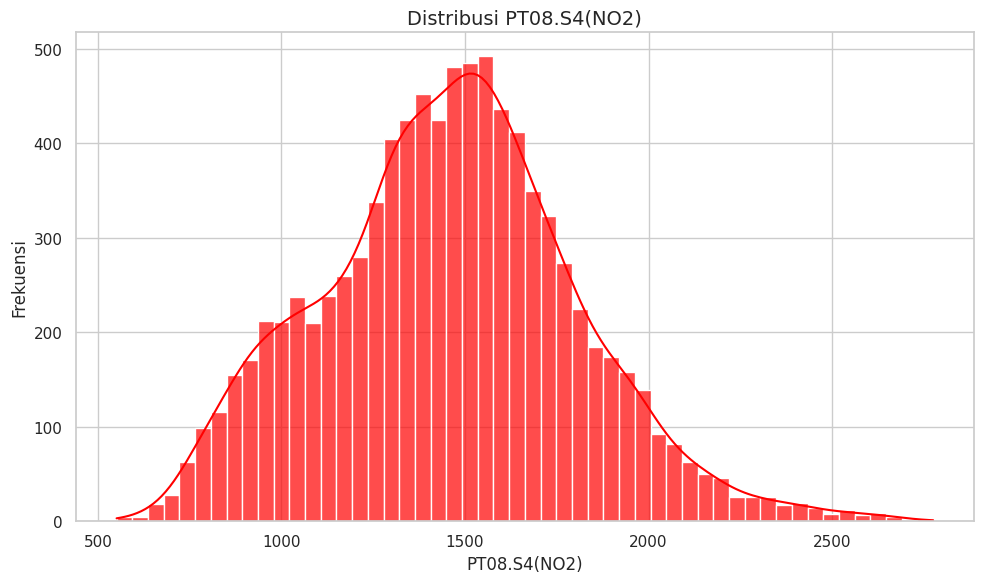

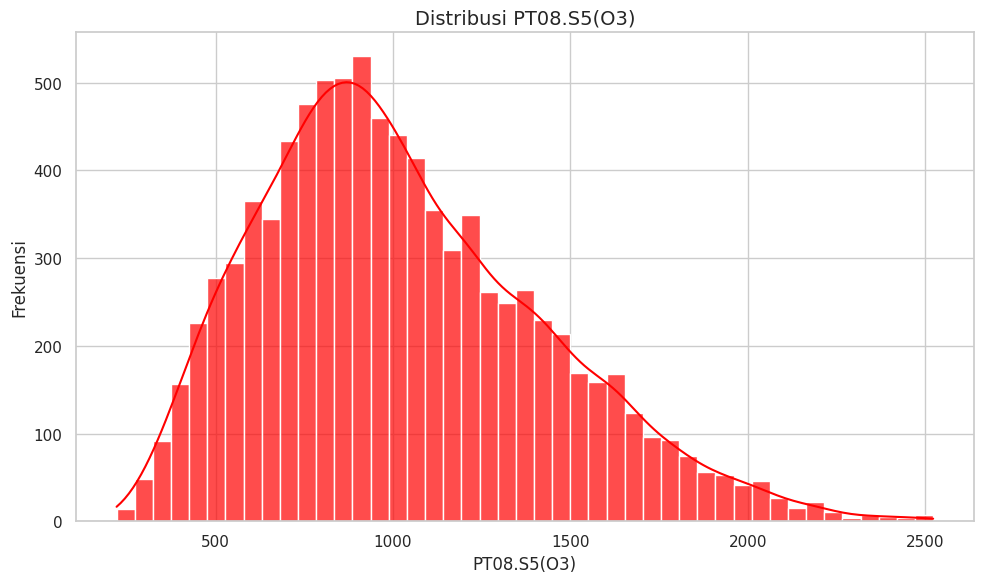

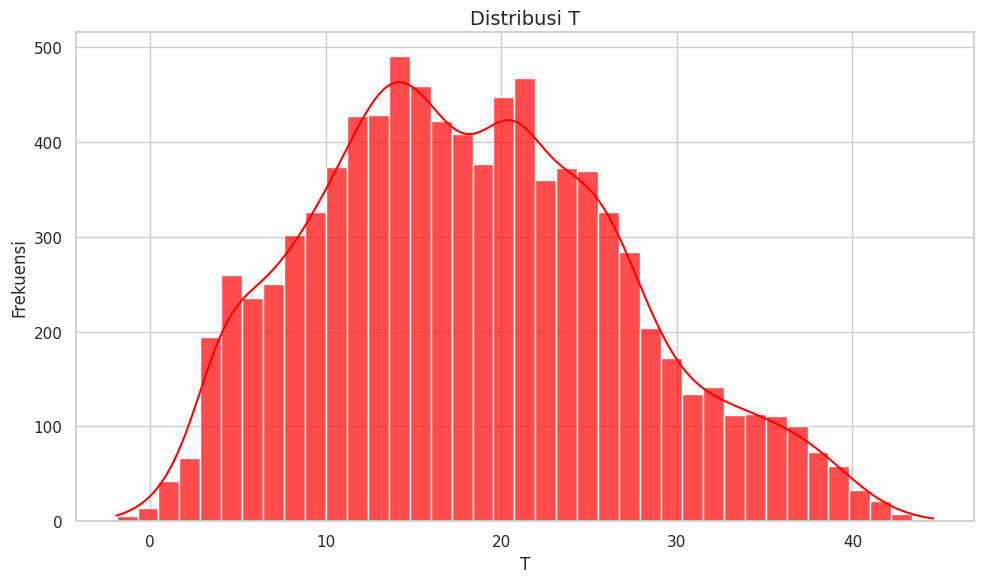

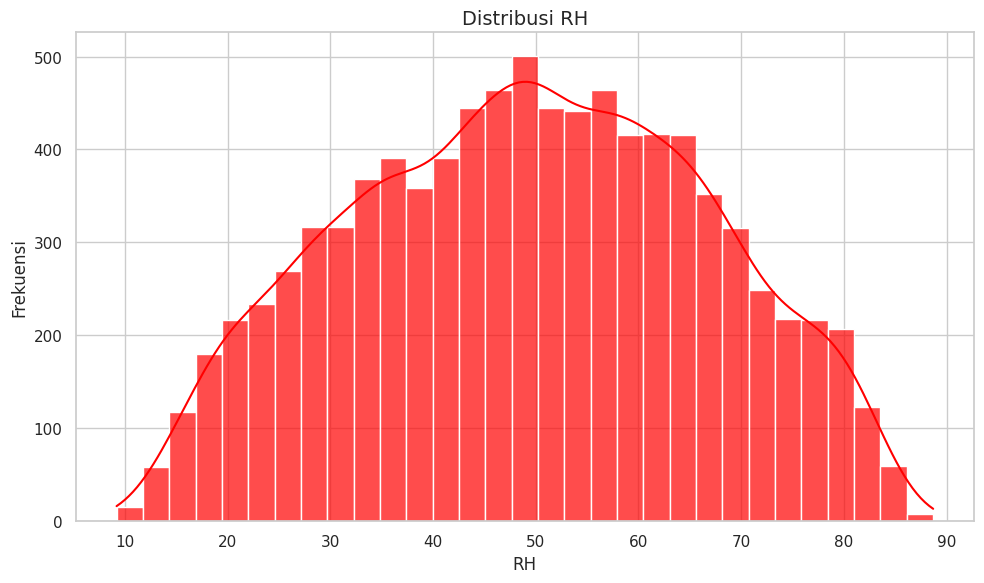

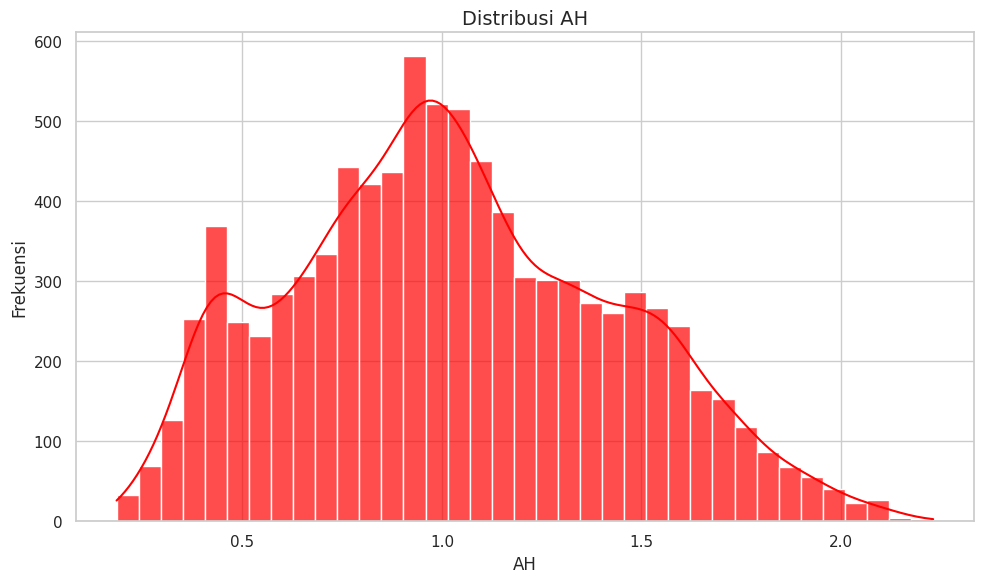

In [398]:


sns.set(style="whitegrid")

for col in cols:
    # Skip jika semua nilai NaN
    if df[col].isna().all():
        print(f"⚠️ Kolom {col} semuanya NaN — dilewati.")
        continue
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='red', alpha=0.7)
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

In [399]:
df.isna().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [400]:
cols_to_drop = df.columns[df.isna().sum() > 5000].tolist()
df = df.drop(columns=cols_to_drop)

In [401]:
feature_cols = [
    'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
]

# Simpan kolom non-numerik (seperti DateTime) sementara
non_numeric_cols = [col for col in df.columns if col not in feature_cols]
df_features = df[feature_cols].copy()

In [402]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# Lakukan imputasi
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_features),
    columns=feature_cols,
    index=df.index
)

# Gabungkan kembali dengan kolom non-numerik (DateTime, dll.)
df_clean = pd.concat([df[non_numeric_cols], df_imputed], axis=1)

In [403]:
df_clean['DateTime'] = pd.to_datetime(
    df_clean['Date'] + ' ' + df_clean['Time'],
    format='%d/%m/%Y %H.%M.%S',
    errors='coerce'
)
df_clean = df_clean.drop(columns=['Date', 'Time'])

In [404]:
df_clean['hour'] = df_clean['DateTime'].dt.hour
df_clean['day_of_week'] = df_clean['DateTime'].dt.dayofweek  # Senin=0, Minggu=6
df_clean['month'] = df_clean['DateTime'].dt.month
df_clean['is_weekend'] = df_clean['day_of_week'].isin([5, 6]).astype(int)  # Sabtu/Minggu

# Opsional: bagi waktu jadi kategori (pagi, siang, dll)
def time_of_day(hour):
    if 5 <= hour < 12:
        return 0  # pagi
    elif 12 <= hour < 17:
        return 1  # siang
    elif 17 <= hour < 21:
        return 2  # sore
    else:
        return 3  # malam

df_clean['time_of_day'] = df_clean['hour'].apply(time_of_day)

In [405]:
df_clean.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,hour,day_of_week,month,is_weekend,time_of_day
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,18,2,3,0,2
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,19,2,3,0,2
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,20,2,3,0,2
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,21,2,3,0,3
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,22,2,3,0,3


In [406]:
df_clean.shape

(9357, 18)

In [407]:
df_clean['NOx(GT)'].shape

(9357,)

In [408]:
target = 'NOx(GT)'

# Fitur: semua kolom numerik kecuali target dan DateTime
features = [col for col in df_clean.columns if col not in [target, 'DateTime']]

X = df_clean[features]
y = df_clean[target]

# Hapus baris dengan missing di target atau fitur
mask = y.notna() & X.notna().all(axis=1)
X = X[mask]

In [409]:
X.shape

(9357, 16)

In [410]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

class ModelComparator:
    def __init__(self):
        self.pipelines = {
            "Linear Regression": Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            "Ridge Regression": Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=1.0))
            ]),
            "KNN Regressor": Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor(n_neighbors=5))
            ]),
            "Random Forest": Pipeline([
                ('regressor', RandomForestRegressor(
                    n_estimators=100, max_depth=10, random_state=42
                ))
            ])
        }
        self.results_ = None
        self.is_fitted_ = False

    def fit(self, X_train, y_train):
        """Latih semua model"""
        for name, pipe in self.pipelines.items():
            print(f"🧠 Melatih {name}...")
            pipe.fit(X_train, y_train)
        self.is_fitted_ = True
        return self

    def evaluate(self, X_test, y_test):
        """Evaluasi semua model dan simpan hasil"""
        if not self.is_fitted_:
            raise ValueError("Model belum dilatih! Panggil .fit() dulu.")
        
        results = []
        for name, pipe in self.pipelines.items():
            y_pred = pipe.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            results.append({"Model": name, "R²": r2, "MAE": mae, "RMSE": rmse})
        
        self.results_ = pd.DataFrame(results).sort_values("R²", ascending=False)
        return self.results_

    def get_best_model(self):
        """Kembalikan pipeline model terbaik"""
        if self.results_ is None:
            raise ValueError("Belum ada evaluasi! Panggil .evaluate() dulu.")
        best_name = self.results_.iloc[0]["Model"]
        return self.pipelines[best_name], best_name

    def summary(self):
        """Tampilkan ringkasan hasil"""
        if self.results_ is None:
            print("Belum ada hasil evaluasi.")
        else:
            print("\n🏆 Perbandingan Model:")
            print(self.results_.to_string(index=False, float_format="{:.4f}".format))


In [411]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat & latih "pipeline utama"
comparator = ModelComparator()
comparator.fit(X_train, y_train)

# Evaluasi
results = comparator.evaluate(X_test, y_test)
print(results)

# Dapatkan model terbaik
best_pipe, best_name = comparator.get_best_model()
print(f"\n✨ Model terbaik: {best_name}")

🧠 Melatih Linear Regression...
🧠 Melatih Ridge Regression...
🧠 Melatih KNN Regressor...
🧠 Melatih Random Forest...
               Model        R²        MAE       RMSE
3      Random Forest  0.949812  27.748950  45.569271
2      KNN Regressor  0.934698  31.007625  51.980146
0  Linear Regression  0.868926  52.164920  73.642909
1   Ridge Regression  0.868915  52.159315  73.646121

✨ Model terbaik: Random Forest
